Pacotes necessários:
    pandas, numpy, matplotlib, scikit-learn, joblib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

In [2]:
# leitura dos dados
data = pd.read_csv('../data/data.csv')

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


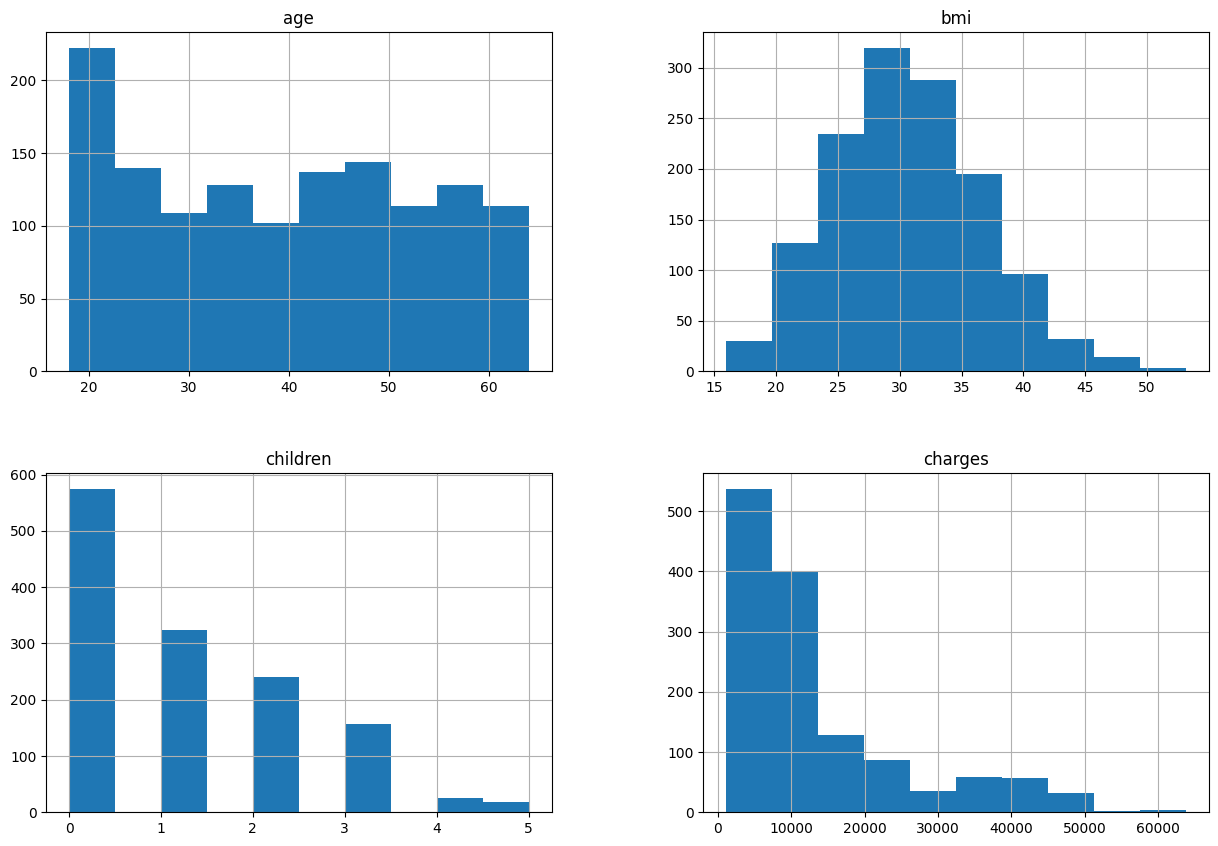

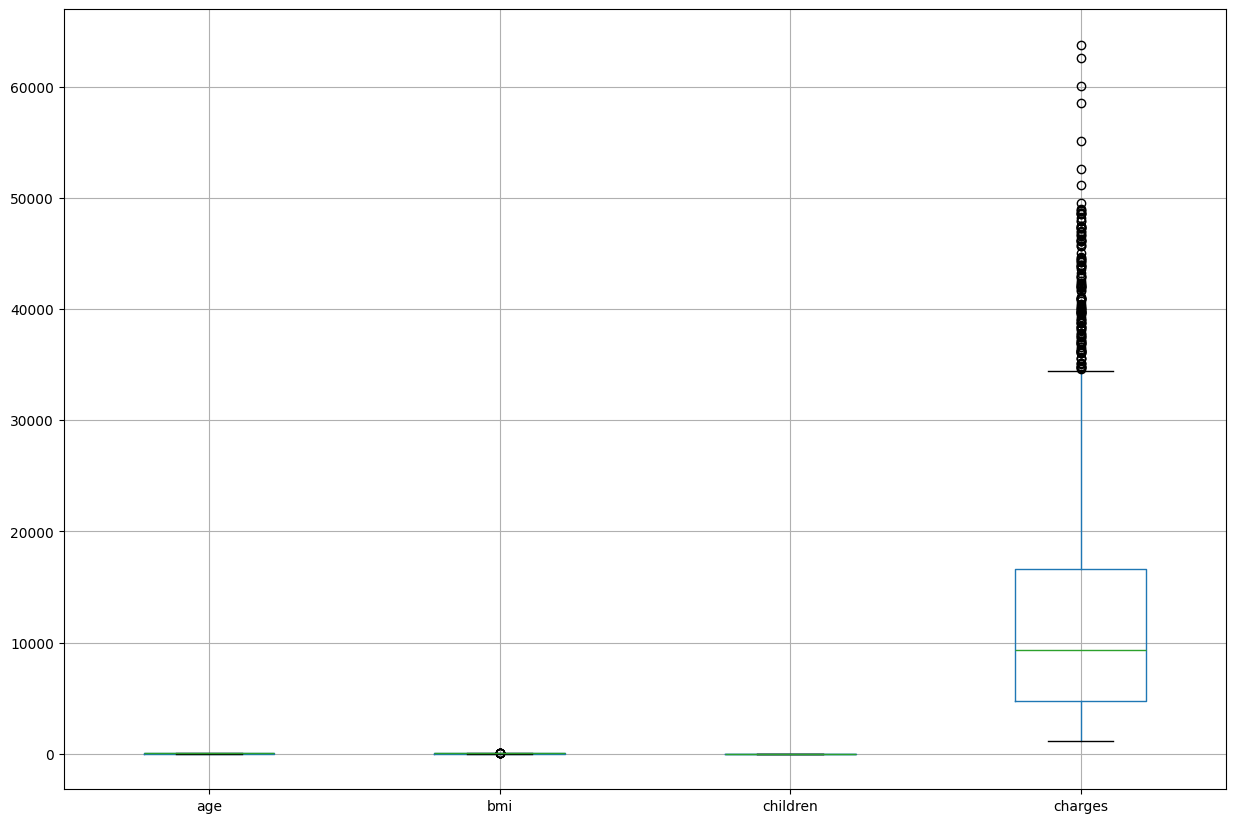

              age   charges
age      1.000000  0.299008
charges  0.299008  1.000000


In [3]:
# Análise exploratória

# Descritiva estatística
print(data.describe())

# Visualização dos dados
data.hist(figsize=(15, 10))
plt.subplots_adjust(bottom=0.1)
plt.show()

data.boxplot(figsize=(15, 10))
plt.subplots_adjust(bottom=0.1)
plt.show()

# Análise de correlação
correlation_matrix = data[["age","charges"]].corr()
print(correlation_matrix)

In [4]:
# Pré-processamento de dados PART1

# Verificar valores nulos
print(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [5]:
# Pré-processamento de dados PART2

# Codificação de Variáveis Categóricas
# Conversão das variáveis  (sex, smoker, region) em variáveis numéricos usando  One-Hot Encoding

categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

#Initialize OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)

one_hot_encoded = ohe.fit_transform(data[categorical_columns])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=ohe.get_feature_names_out(categorical_columns))
data_encoded = pd.concat([data, one_hot_df], axis=1)

data_encoded = data_encoded.drop(categorical_columns, axis=1)
data_encoded = data_encoded.drop("charges", axis=1)

data_encoded.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [6]:
# Treinamento do modelo

# Split the dataset into training and testing sets
X = data_encoded
y = data['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

# Choose an appropriate regression model
model = LinearRegression()

# Train the model with the training data
model.fit(X_train, y_train)

LinearRegression()

RMSE: 33596915.85136145
MAE: 4181.194473753641
R²: 0.7835929767120724


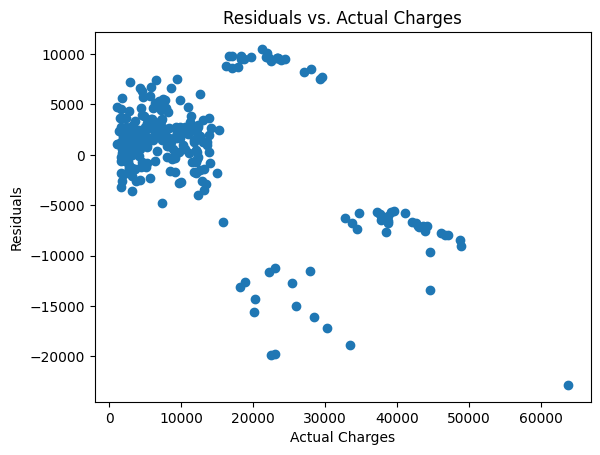

In [7]:
# Avaliação do Modelo
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('RMSE:', rmse)
print('MAE:', mae)
print('R²:', r2)

# Análise residual
plt.scatter(y_test, y_pred - y_test)
plt.xlabel('Actual Charges')
plt.ylabel('Residuals')
plt.title('Residuals vs. Actual Charges')
plt.show()

In [8]:
filename = "./prediction_model.pkl"
joblib.dump(model, filename)

['./prediction_model.pkl']